In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Hotel Reservations.csv')

# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (36275, 19)


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [7]:
# Display summary statistics for the DataFrame
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                

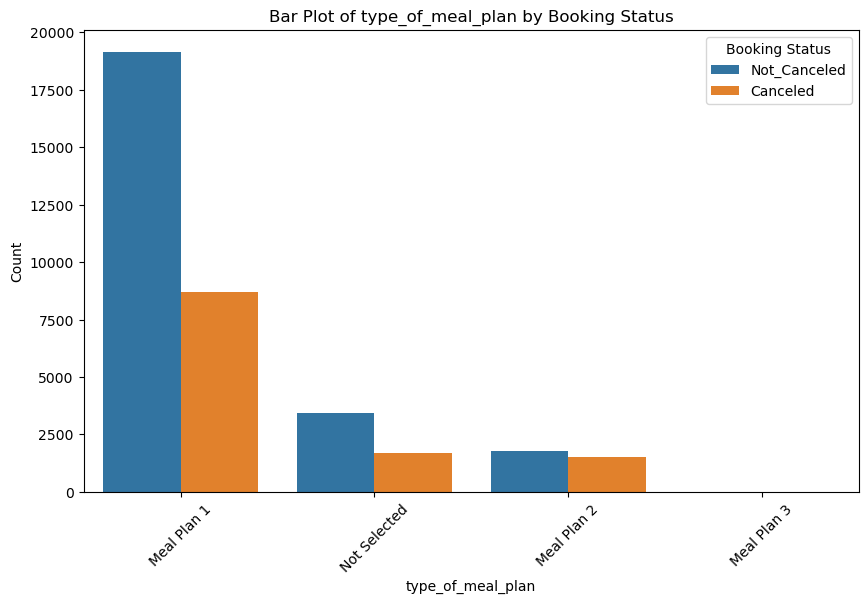

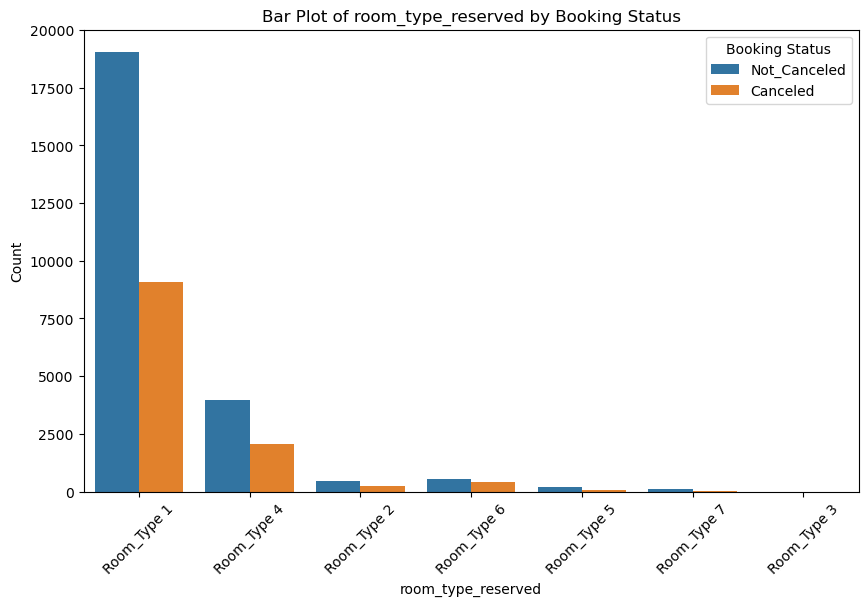

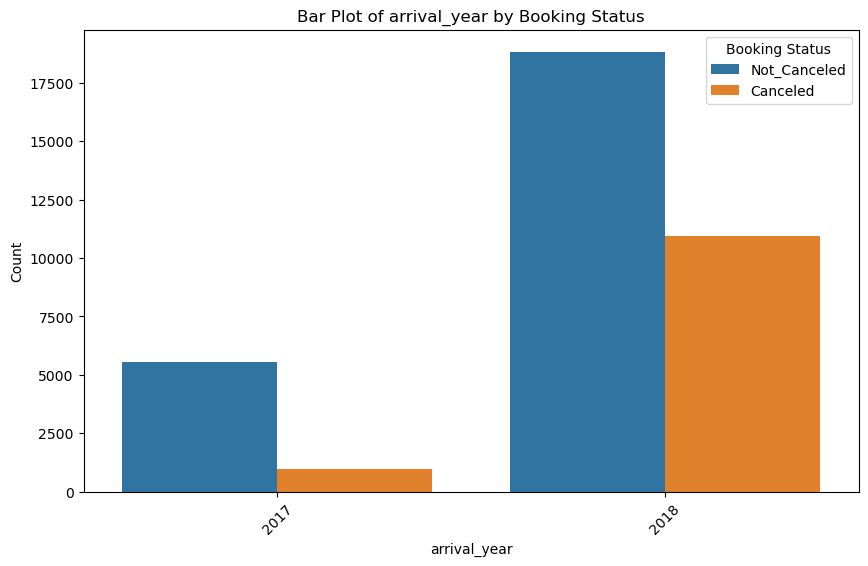

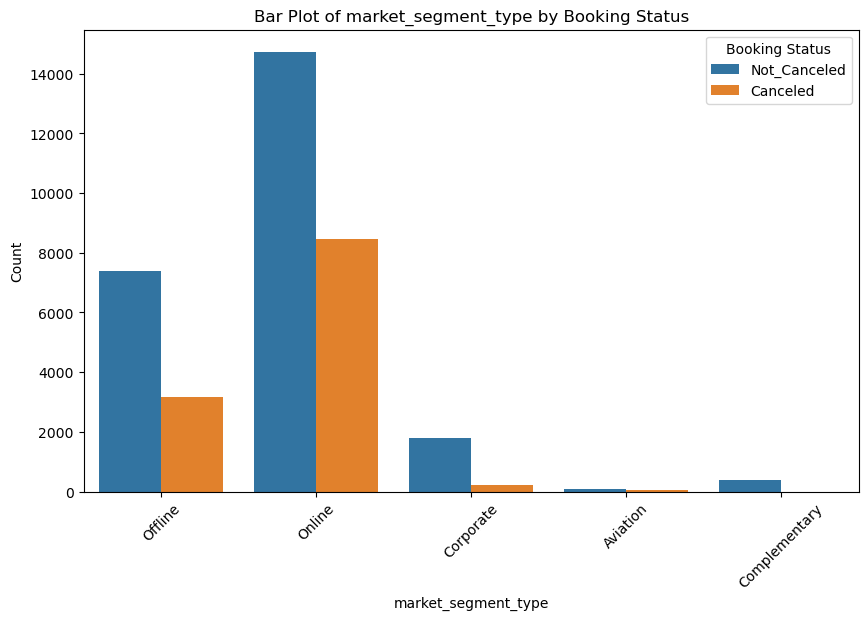

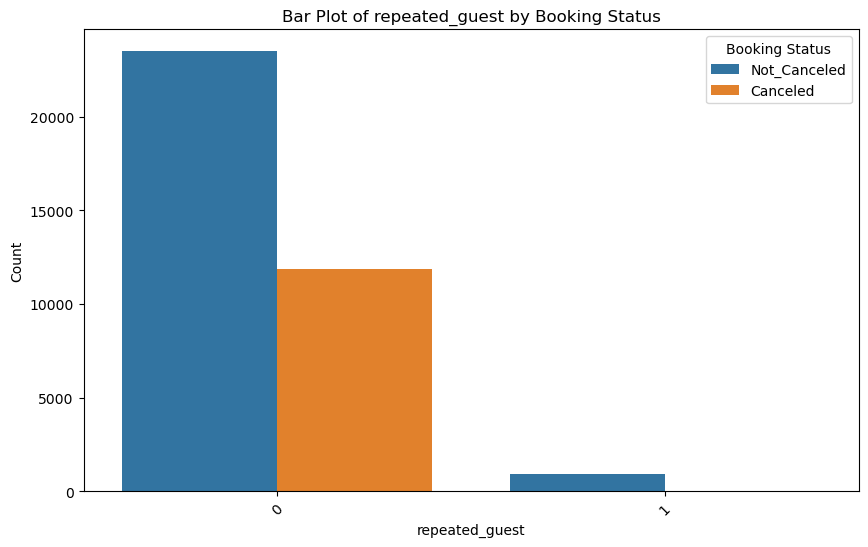

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


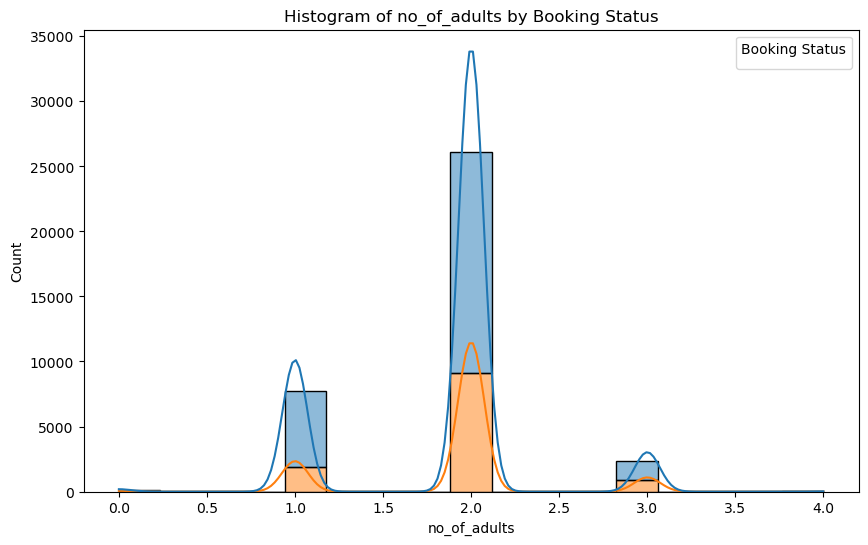

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


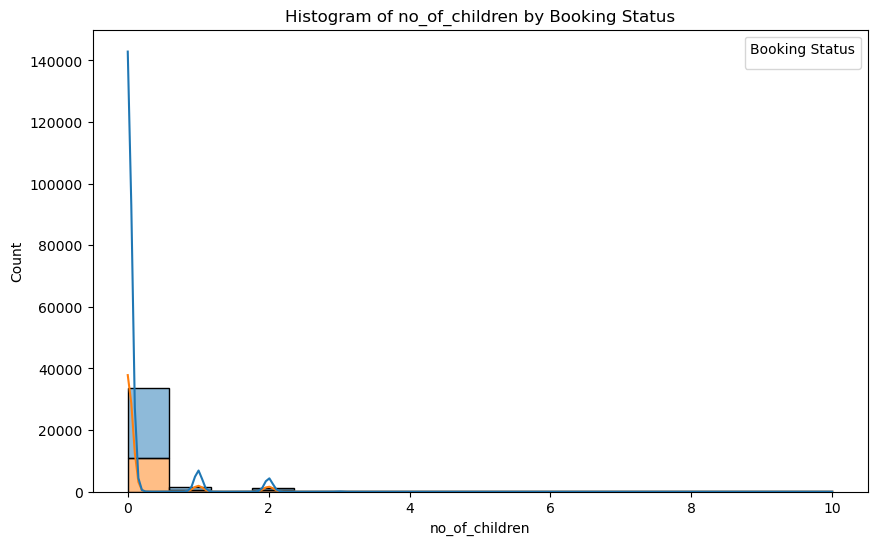

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


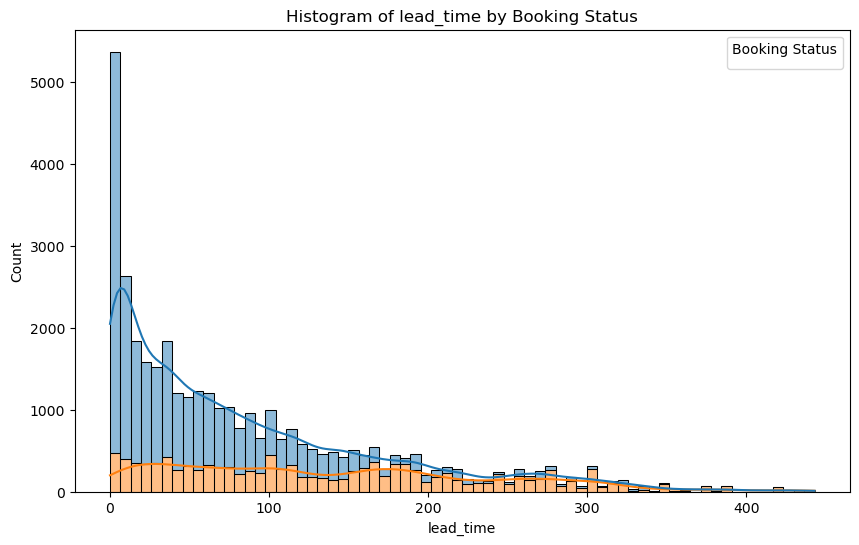

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


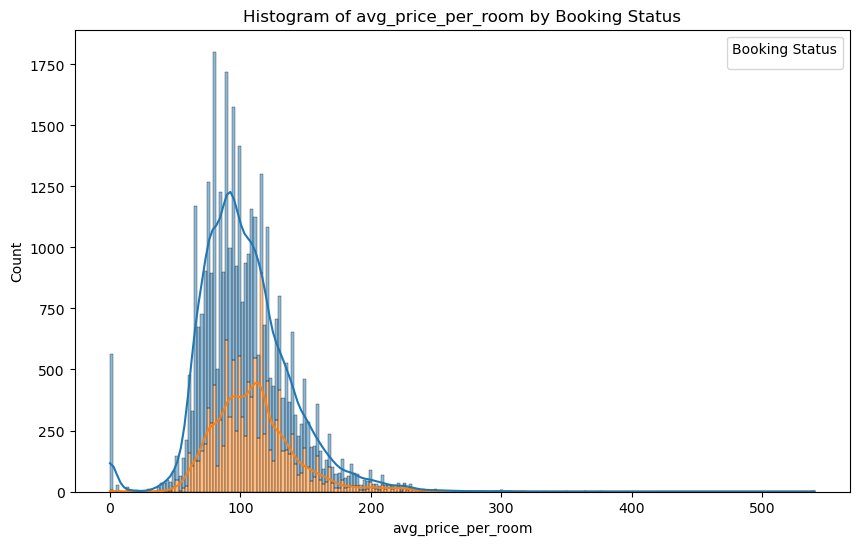

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


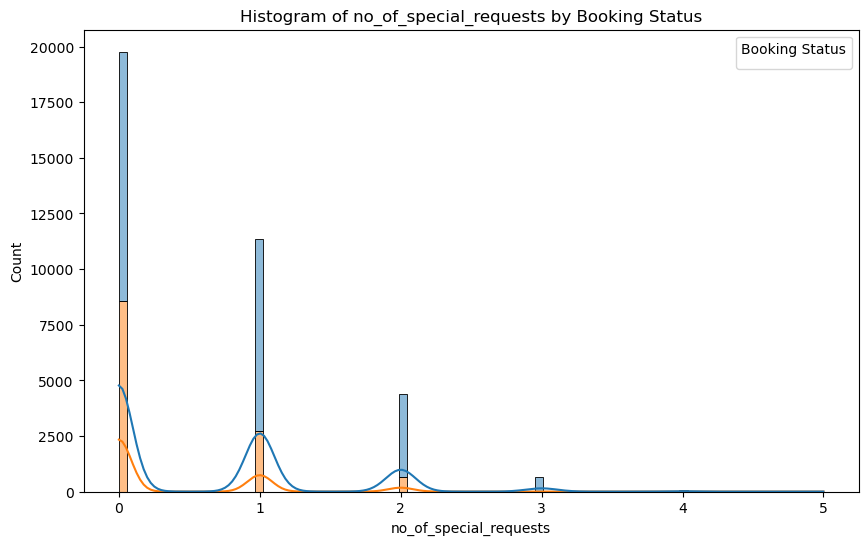

In [7]:
# Select categorical variables for bar plots
categorical_variables = ['type_of_meal_plan', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest']

# Select continuous variables for histograms
continuous_variables = ['no_of_adults', 'no_of_children', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']

# Visualize categorical variables using bar plots
for col in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='booking_status')
    plt.title(f'Bar Plot of {col} by Booking Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Booking Status', loc='upper right')
    plt.show()

# Visualize continuous variables using histograms
for col in continuous_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='booking_status', kde=True, multiple='stack')
    plt.title(f'Histogram of {col} by Booking Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Booking Status', loc='upper right')
    plt.show()

In [8]:
from scipy.stats import chi2_contingency

# Select categorical variables
categorical_variables = ['type_of_meal_plan', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest']

# Perform chi-square test for each categorical variable
for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df['booking_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square Test for {variable}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

    if p < 0.05:  # Assuming a significance level of 0.05
        print(f"The association between {variable} and booking_status is statistically significant.\n")
    else:
        print(f"The association between {variable} and booking_status is not statistically significant.\n")

Chi-square Test for type_of_meal_plan:
Chi-square statistic: 278.29490920586017
P-value: 4.951915406087789e-60

The association between type_of_meal_plan and booking_status is statistically significant.

Chi-square Test for room_type_reserved:
Chi-square statistic: 57.33495179790707
P-value: 1.5627796772447482e-10

The association between room_type_reserved and booking_status is statistically significant.

Chi-square Test for arrival_year:
Chi-square statistic: 1168.1695496036032
P-value: 5.046862578530706e-256

The association between arrival_year and booking_status is statistically significant.

Chi-square Test for market_segment_type:
Chi-square statistic: 814.108865240557
P-value: 6.748763024557236e-175

The association between market_segment_type and booking_status is statistically significant.

Chi-square Test for repeated_guest:
Chi-square statistic: 416.09555137693894
P-value: 1.7270504808167525e-92

The association between repeated_guest and booking_status is statistically sig

In [14]:
df.columns = df.columns.str.strip()

In [16]:
# Check if the column exists in the DataFrame
if 'booking_status' in df.columns:
    # Remove leading/trailing white spaces from all column names
    df.columns = df.columns.str.strip()

    # Check again for the corrected column name
    if 'booking_status' in df.columns:
        # Proceed with your code here
        pass
    else:
        print("Column 'booking_status' still not found after stripping white spaces.")
else:
    print("Column 'booking_status' not found in the DataFrame.")

In [18]:
# Print unique values of the target variable
print(df['booking_status'].unique())

['Not_Canceled' 'Canceled']


In [9]:
print(df.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [10]:
# Get the data types of each column
column_types = df.dtypes

# Print the data types
print(column_types)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object
